# 1. Import required libraries and read the dataset.

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Apps_data.csv')

# 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.


In [4]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [6]:
data.shape

(10841, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
# .isnull() will help us find the null values present in the data set given
# .sum() help us calculating the total count of null values in an indivisual column
missing_count = data.isnull().sum()

print("Missing Values Count:")
print(missing_count)

Missing Values Count:
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


# 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.


In [9]:
data.select_dtypes(include='object').describe()
# for object data types

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


In [10]:
summary_stats = data.describe()
print("\nSummary statistics of the dataset:")
print(summary_stats)
# for float data types


Summary statistics of the dataset:
            Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000


# 4. Check if there are any duplicate records in the dataset? if any drop them.

In [11]:
# Check for duplicate records
duplicates = data.duplicated().sum()

# Display the number of duplicate records
print("Number of duplicate records:", duplicates)

Number of duplicate records: 483


In [12]:
data_no_duplicates = data.drop_duplicates(inplace=True)

In [13]:
data.duplicated().sum()

0

In [14]:
data.shape

(10358, 13)

# 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.


In [15]:
# Finding the count of unique values for category column
unique_Category_count = data['Category'].nunique()

print(f"Count of unique Category: {unique_Category_count}")

Count of unique Category: 34


In [16]:
# Check unique categories in the 'Category' column
unique_categories = data['Category'].unique()

print("Unique categories in the Category column:")
unique_categories

Unique categories in the Category column:


array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [17]:
data = data.drop(data[data["Category"] == "1.9"].index)

In [18]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

# 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories (>3.5 is high rest low)

In [19]:
missing_values = data['Rating'].isna().sum()
print(f'The number of missing values in Rating column is: {missing_values}')

The number of missing values in Rating column is: 1465


In [20]:
dropping_values = data.dropna(subset=['Rating'],inplace = True)
dropping_values

In [21]:
data['Rating'].isna().sum()

0

# 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.


In [22]:
data["Rating_category"]=data["Rating"].apply(lambda x : "high" if x>3.5 else "low")

In [23]:
data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high


In [24]:
rating_category_distribution = data['Rating_category'].value_counts()

print("Distribution of 'Rating_category':")
print(rating_category_distribution)

Distribution of 'Rating_category':
high    8012
low      880
Name: Rating_category, dtype: int64


<AxesSubplot:xlabel='Rating_category', ylabel='count'>

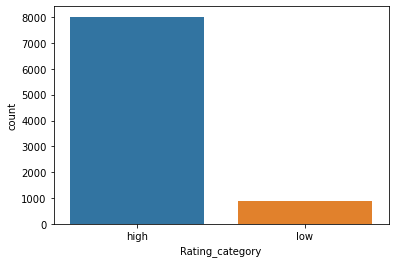

In [25]:
sns.countplot(data = data, x='Rating_category')

# 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

In [26]:
data['Reviews'] = data['Reviews'].astype(int)

<AxesSubplot:>

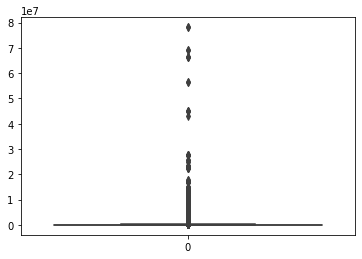

In [27]:
sns.boxplot(data=data['Reviews'])

In [28]:
Quantile_1 = data['Reviews'].quantile(0.25)
Quantile_3 = data['Reviews'].quantile(0.75)
IQR = Quantile_3-Quantile_1
lower_wall = Quantile_1 - 1.5 * IQR
upper_wall = Quantile_3 + 1.5 * IQR

outliers = data[(data['Reviews'] < lower_wall) | (data['Reviews'] > upper_wall)]
data['Reviews'] = np.log(data['Reviews'])

<AxesSubplot:>

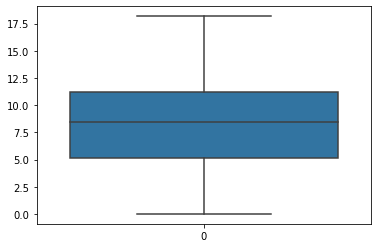

In [29]:
sns.boxplot(data = data['Reviews'])

In [30]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.068904,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,3.9,6.874198,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379508,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281384,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.874198,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high


# 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')


In [31]:
data = data[data['Size'] != 'Varies with device']

def convert_number(size):
    value = 1
    if size.endswith('M'):
        value = 1e6
    elif size.endswith('K'):
        value = 1e3
    return float(size[:-1]) * value

data['Size'] = data['Size'].apply(convert_number)

In [32]:
data.sample(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
4389,N-Com Wizard,COMMUNICATION,3.3,6.866933,3800000.0,"50,000+",Free,0,Everyone,Communication,"September 21, 2017",2.1.2,2.3.3 and up,low
1050,Citibanamex Movil,FINANCE,3.6,10.864866,42000000.0,"5,000,000+",Free,0,Everyone,Finance,"July 27, 2018",20.1.0,5.0 and up,high
1278,Cycling - Bike Tracker,HEALTH_AND_FITNESS,4.5,9.117786,4000000.0,"500,000+",Free,0,Everyone,Health & Fitness,"July 30, 2018",1.1.22,4.1 and up,high


# 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [33]:
print("Unique values in 'Installs' column before treatment:")
print(data['Installs'].unique())

data['Installs'] = data['Installs'].str.replace(',', '', regex = True)
data['Installs'] = data['Installs'].str.replace('+', '', regex = True)
data['Installs'] = data['Installs'].astype(int)

# Check the unique values in the 'Installs' column after treatment
print("\nUnique values in 'Installs' column after treatment:")
print(data['Installs'].unique())

# Save the modified DataFrame to a new CSV file if needed
data.to_csv('modified_data.csv', index=False)

Unique values in 'Installs' column before treatment:
['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000+'
 '500,000,000+' '100+' '500+' '10+' '1,000,000,000+' '5+' '50+' '1+']

Unique values in 'Installs' column after treatment:
[     10000     500000    5000000   50000000     100000      50000
    1000000   10000000       5000  100000000       1000  500000000
        100        500         10 1000000000          5         50
          1]


In [34]:
data.sample(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
304,Manga Rock - Best Manga Reader,COMICS,4.4,12.384093,28000000.0,1000000,Free,0,Teen,Comics,"July 9, 2018",3.4.3_world,5.0 and up,high
4483,Materialistic P Wallpapers,PERSONALIZATION,4.8,3.178054,3600000.0,1000,Free,0,Everyone,Personalization,"August 3, 2018",2.244,5.0 and up,high


# 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [35]:
print("Unique values in 'Price' column before treatment:")
print(data['Price'].unique())

data['Price'] = data['Price'].str.replace('$','', regex=True).astype(float)

# Check the unique values in the 'Installs' column after treatment
print("\nUnique values in 'Price' column after treatment:")
print(data['Price'].unique())

# Save the modified DataFrame to a new CSV file if needed
data.to_csv('modified_data.csv', index=False)

Unique values in 'Price' column before treatment:
['0' '$4.99' '$6.99' '$7.99' '$3.99' '$5.99' '$2.99' '$1.99' '$9.99'
 '$0.99' '$9.00' '$5.49' '$10.00' '$24.99' '$11.99' '$79.99' '$16.99'
 '$14.99' '$29.99' '$12.99' '$3.49' '$10.99' '$7.49' '$1.50' '$19.99'
 '$15.99' '$33.99' '$39.99' '$2.49' '$4.49' '$1.70' '$1.49' '$3.88'
 '$399.99' '$17.99' '$400.00' '$3.02' '$1.76' '$4.84' '$4.77' '$1.61'
 '$1.59' '$6.49' '$1.29' '$299.99' '$379.99' '$37.99' '$18.99' '$389.99'
 '$8.49' '$1.75' '$14.00' '$2.00' '$3.08' '$2.59' '$19.40' '$15.46'
 '$8.99' '$3.04' '$13.99' '$4.29' '$3.28' '$4.60' '$1.00' '$2.90' '$1.97'
 '$2.56' '$1.20']

Unique values in 'Price' column after treatment:
[  0.     4.99   6.99   7.99   3.99   5.99   2.99   1.99   9.99   0.99
   9.     5.49  10.    24.99  11.99  79.99  16.99  14.99  29.99  12.99
   3.49  10.99   7.49   1.5   19.99  15.99  33.99  39.99   2.49   4.49
   1.7    1.49   3.88 399.99  17.99 400.     3.02   1.76   4.84   4.77
   1.61   1.59   6.49   1.29 299.99 

In [36]:
data.sample(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
5186,SMS AI Bot,TOOLS,3.8,4.488636,3900000.0,10000,Free,0.0,Everyone,Tools,"July 1, 2018",3.0.4,4.1 and up,high
383,imo free video calls and chat,COMMUNICATION,4.3,15.381203,11000000.0,500000000,Free,0.0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up,high
5297,Weapons simulator AK-47,FAMILY,4.1,3.044522,26000000.0,5000,Free,0.0,Everyone,Simulation,"May 15, 2017",1,4.1 and up,high


# 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)

In [37]:
data.drop(columns=[ 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' ], axis=1, inplace = True)

In [38]:
data.sample(3)

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
7273,HEALTH_AND_FITNESS,1.791759,9700000.0,100,Free,0.0,Teen,high
5000,GAME,6.866933,18000000.0,50000,Free,0.0,Everyone,high
1869,GAME,16.925918,74000000.0,500000000,Free,0.0,Everyone,high


# 13. Encode the categorical columns.


In [39]:
data_dummies = data.copy()
data_dummies = pd.get_dummies(data = data_dummies,prefix="Category",drop_first=True,columns=["Category"],dtype='int',sparse=False)
data_dummies = pd.get_dummies(data = data_dummies,prefix="Type",drop_first=True,columns=["Type"],dtype='int')
data_dummies = pd.get_dummies(data = data_dummies,prefix='Content Rating',drop_first=True,columns=["Content Rating"],dtype='int')

In [40]:
data_dummies.shape

(7424, 43)

In [41]:
data_dummies.head(3)

,Reviews,Size,Installs,Price,Rating_category,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,5.068904,19000000.0,10000,0.0,high,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,6.874198,14000000.0,500000,0.0,high,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,11.379508,8700000.0,5000000,0.0,high,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# 14. Segregate the target and independent features (Hint: Use Rating_category as the target)


In [42]:
Dependent = data_dummies["Rating_category"]
Independent = data_dummies.drop(columns=["Rating_category"],axis=1)

In [43]:
Dependent.head()

0    high
1    high
2    high
3    high
4    high
Name: Rating_category, dtype: object

In [44]:
Independent.head()

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,5.068904,19000000.0,10000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,6.874198,14000000.0,500000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,11.379508,8700000.0,5000000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,12.281384,25000000.0,50000000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6.874198,2800000.0,100000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# 15. Split the dataset into train and test.


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train,x_test,y_train,y_test=train_test_split(Independent,Dependent,test_size=0.2)

In [47]:
from sklearn.preprocessing import StandardScaler

STD_scale = StandardScaler()

# 16. Standardize the data, so that the values are within a particular range.

In [48]:
Numeric_data = ['Reviews','Size','Installs','Price']
data_dummies[Numeric_data] = STD_scale.fit_transform(data_dummies[Numeric_data])

In [49]:
data_dummies.describe()

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
count,7.424000e+03,7.424000e+03,7.424000e+03,7.424000e+03,7424.000000,7424.000000,7424.000000,7424.000000,7424.000000,7424.000000,...,7424.000000,7424.000000,7424.000000,7424.000000,7424.000000,7424.000000,7424.000000,7424.000000,7424.000000,7424.000000
mean,2.947534e-16,-1.651090e-16,-2.878239e-16,4.758526e-16,0.008486,0.004984,0.019262,0.030307,0.006600,0.027748,...,0.085399,0.019801,0.015625,0.006870,0.073680,0.802532,0.040275,0.044720,0.112069,0.000135
std,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,0.091734,0.070425,0.137453,0.171443,0.080979,0.164261,...,0.279493,0.139324,0.124028,0.082604,0.261267,0.398115,0.196616,0.206702,0.315473,0.011606
min,-2.037304e+00,-9.695233e-01,-1.689795e-01,-6.305842e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.068230e-01,-7.520155e-01,-1.687635e-01,-6.305842e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,6.888914e-03,-3.724423e-01,-1.668197e-01,-6.305842e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,7.786229e-01,4.378824e-01,-1.473817e-01,-6.305842e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.680928e+00,3.295343e+00,2.142883e+01,2.252640e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# PROJECT COMPLETED :)